# CIFAR-10 Image Classification Using Convolutional Neural Networks

## Introduction

In this notebook, we will build and train a deep learning model to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset is a widely used benchmark in the field of machine learning and computer vision. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 testing images.

We will use TensorFlow and Keras to construct a Convolutional Neural Network (CNN) that can effectively classify these images. CNNs are particularly well-suited for image classification tasks due to their ability to capture spatial hierarchies in images.

The main steps in this notebook include:

1. **Importing Libraries**: We will import the necessary libraries for our project.
2. **Loading the Dataset**: We will load the CIFAR-10 dataset and perform basic preprocessing.
3. **Visualizing the Data**: We will visualize some sample images from the dataset to understand the data we are working with.
4. **Data Augmentation**: We will apply data augmentation techniques to increase the diversity of our training data.
5. **Building the Model**: We will construct a CNN using Keras, explaining our choice of architecture and hyperparameters.
6. **Training the Model**: We will train our model using the training data and visualize the training process.
7. **Evaluating the Model**: We will evaluate the model's performance on the test dataset and visualize the results.
8. **Conclusion**: We will summarize our findings and discuss potential improvements.

Let's get started!

# Importing Libraries

In this section, we import the necessary libraries for our deep learning project. These include:

- `tensorflow` and its submodules `layers`, `models`, `regularizers`, and `callbacks` for building and training the neural network.
- `matplotlib.pyplot` for visualizing data and results.
- `ImageDataGenerator` from `tensorflow.keras.preprocessing.image` for augmenting the image data during training.
- `datetime` for managing time-related data.

In [1]:
    import tensorflow as tf
    from tensorflow.keras import layers, models
    import matplotlib.pyplot as plt
    from tensorflow.keras import regularizers
    import datetime
    from tensorflow.keras.callbacks import TensorBoard
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading CIFAR-10 Dataset

In this section, we load the CIFAR-10 dataset using `tf.keras.datasets.cifar10.load_data()`. The dataset is divided into training and testing sets:

- `train_images` and `train_labels`: These contain the images and their corresponding labels for training the model.
- `test_images` and `test_labels`: These contain the images and their corresponding labels for testing the model's performance.

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Visualizing Sample Images from CIFAR-10 Dataset

In this section, we define the class names and visualize some sample images from the CIFAR-10 training dataset.

- `class_names`: A list of class names corresponding to the labels in the CIFAR-10 dataset.
- We use `matplotlib.pyplot` to plot a 5x5 grid of sample images along with their corresponding class labels.

The following code displays 25 sample images from the training dataset with their labels:

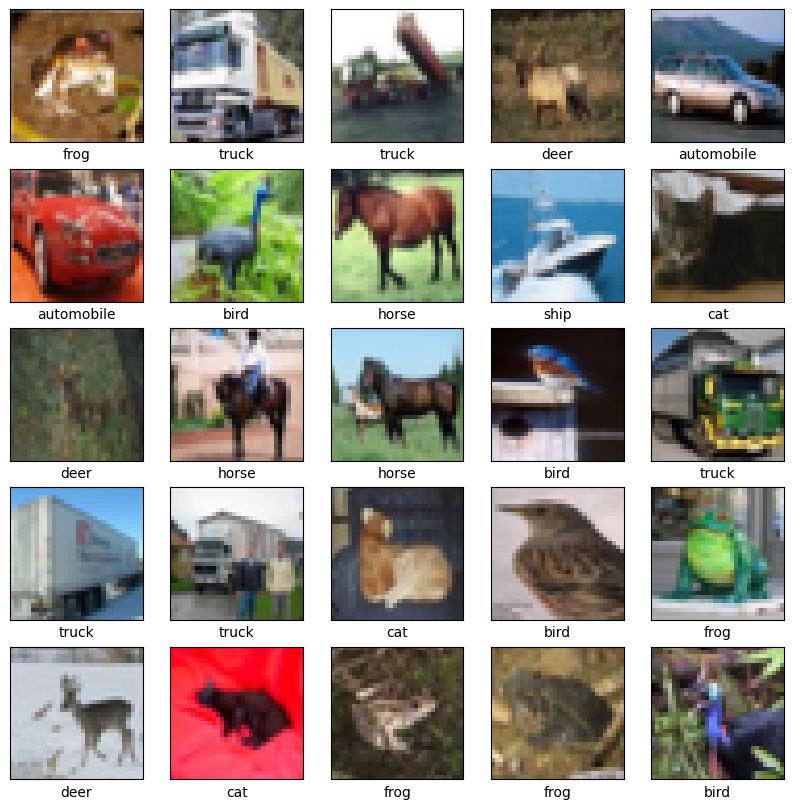

In [3]:
import numpy as np

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# One-Hot Encoding the Labels

In this section, we one-hot encode the labels of the training and testing datasets. One-hot encoding converts categorical labels into a binary matrix representation, which is useful for training neural networks.

- `train_labels_one_hot`: One-hot encoded labels for the training dataset.
- `test_labels_one_hot`: One-hot encoded labels for the testing dataset.

The following code performs one-hot encoding on the labels:

In [4]:
# One-hot encode the labels
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Defining Model Parameters

In this section, we define various parameters for building our convolutional neural network (CNN):

- `imageSize`: The size of the input images (32x32 pixels with 3 color channels).
- `numFilters`: The number of filters to use in the convolutional layers.
- `filterSize`: The size of the filters in the convolutional layers.
- `numImageCategories`: The number of categories in the CIFAR-10 dataset (10 classes).

The following code sets these parameters:

In [5]:
imageSize = (32, 32, 3)
numFilters = 32
filterSize = (5, 5)
numImageCategories = 10

# Building the Convolutional Neural Network (CNN)

In this section, we build a sequential convolutional neural network (CNN) model using the `tensorflow.keras` library. The model consists of the following layers:

1. **Batch Normalization Layer**: Normalizes the inputs to improve training stability.
2. **First Convolutional Layer**:
   - `ZeroPadding2D`: Adds zero padding to the input.
   - `Conv2D`: Applies convolution with `numFilters` and `filterSize`, ReLU activation, and L2 regularization.
   - `MaxPooling2D`: Reduces the spatial dimensions.
3. **Second Convolutional Layer**:
   - `ZeroPadding2D`
   - `Conv2D`: Similar configuration as the first layer.
   - `MaxPooling2D`
4. **Third Convolutional Layer**:
   - `ZeroPadding2D`
   - `Conv2D`: Uses `numFilters * 2` for deeper feature extraction.
   - `MaxPooling2D`
5. **Fourth Convolutional Layer**:
   - `ZeroPadding2D`
   - `Conv2D`: Uses `numFilters` and same padding.
   - `MaxPooling2D`
6. **Flatten and Fully Connected Layers**:
   - `MaxPooling2D`: Final pooling layer to further reduce dimensions.
   - `Flatten`: Flattens the pooled feature maps into a single vector.
   - `Dense`: Fully connected layer with 64 units, ReLU activation, and L2 regularization.
   - `Dense`: Output layer with 10 units (one for each class) and softmax activation for classification.

The model is compiled with the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric.

The following code builds and compiles the CNN model:

In [6]:
model = models.Sequential([
    # Input and normalization
    layers.BatchNormalization(input_shape = imageSize),
    
    # First conv layer
    layers.ZeroPadding2D(padding=(2, 2)),
    layers.Conv2D(numFilters, filterSize, padding='valid', activation='relu',kernel_regularizer=regularizers.l2(0.004)),
    layers.MaxPooling2D((2, 2)),
    
    # Second conv layer
    layers.ZeroPadding2D(padding=(2, 2)),
    layers.Conv2D(numFilters, filterSize, padding='valid', activation='relu',kernel_regularizer=regularizers.l2(0.004)),
    layers.MaxPooling2D((2, 2)),
    
    # Third conv layer
    layers.ZeroPadding2D(padding=(2, 2)),
    layers.Conv2D(numFilters*2, filterSize, padding='valid', activation='relu',kernel_regularizer=regularizers.l2(0.004)),
    layers.MaxPooling2D((2, 2)),

    #Fourth conv layer
    layers.ZeroPadding2D(padding=(2, 2)),
    layers.Conv2D(numFilters, filterSize, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.004)),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten and fully connected layers
    layers.MaxPooling2D(pool_size=(2, 2), strides=2), 
    layers.Flatten(),  # Flatten the output of the MaxPooling to feed into the Dense layer
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.004)),
    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.004)),    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',  # Adjust depending on your problem
              metrics=['accuracy'])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-05-17 15:57:50.631185: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-17 15:57:50.631202: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-17 15:57:50.631206: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-17 15:57:50.631228: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-17 15:57:50.631241: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localho

# Model Summary

In this section, we generate a summary of the CNN model we built. The summary includes details about each layer, such as the layer type, output shape, and the number of parameters.

The following code generates and displays the model summary:

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d (ZeroPadding2D)  │ (None, 36, 36, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 20, 20, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 12, 12, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_3                │ (None, 8, 8, 64)       │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 32)       │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,478 (544.84 KB)

 Trainable params: 139,472 (544.81 KB)

 Non-trainable params: 6 (24.00 B)

# Setting Up TensorBoard Callback

In this section, we set up TensorBoard for visualizing the training process. TensorBoard provides insights into the model's performance and training metrics.

- `log_dir`: Directory where the log files will be saved. The directory name includes the current date and time for unique identification.
- `tensorboard_callback`: A callback to use TensorBoard during training, which logs data at each epoch.

The following code sets up the TensorBoard callback:

In [8]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Defining Callbacks

In this section, we define callbacks to be used during the training process. Callbacks are useful for dynamically adjusting the training process and logging information.

- **Learning Rate Scheduler**: Adjusts the learning rate during training. Here, the learning rate is decreased by a factor of 10 every 20 epochs.
- **TensorBoard Callback**: Logs training metrics to TensorBoard for visualization.

The following code defines the callbacks:

In [9]:
callbacks = [
    # Adjust the learning rate
    tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-3 * 0.1**(epoch // 20), verbose=1),   
    tensorboard_callback,
]


# Training the Model

In this section, we train the CNN model using the training dataset. We specify the number of epochs, batch size, validation data, and the callbacks we defined earlier.

- `train_images` and `train_labels_one_hot`: Training data and labels.
- `epochs`: Number of training epochs (50 in this case).
- `batch_size`: Number of samples per gradient update (128 in this case).
- `validation_data`: Validation data and labels used to evaluate the model during training.
- `callbacks`: Callbacks for dynamic adjustments and logging.

The following code trains the model:

In [10]:
history = model.fit(train_images, train_labels_one_hot,  
                    epochs=50,
                    batch_size=128,
                    validation_data=(test_images, test_labels_one_hot), 
                    callbacks=callbacks,
                    verbose=1)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50


2024-05-17 15:57:51.494903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.3435 - loss: 2.3423 - val_accuracy: 0.4980 - val_loss: 1.6931 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.5465 - loss: 1.5963 - val_accuracy: 0.6028 - val_loss: 1.4469 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6259 - loss: 1.3908 - val_accuracy: 0.6263 - val_loss: 1.3650 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6671 - loss: 1.2750 - val_accuracy: 0.6911 - val_loss: 1.2323 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7023 - loss: 1.1959 - val_accuracy: 0.7140 - val_loss: 1.1713 - learnin

# Visualizing Training and Validation Metrics

In this section, we visualize the training and validation accuracy and loss over the epochs.

- **Training and Validation Accuracy**: Plots the accuracy of the model on the training and validation data for each epoch.
- **Training and Validation Loss**: Plots the loss of the model on the training and validation data for each epoch.

The following code generates the plots:

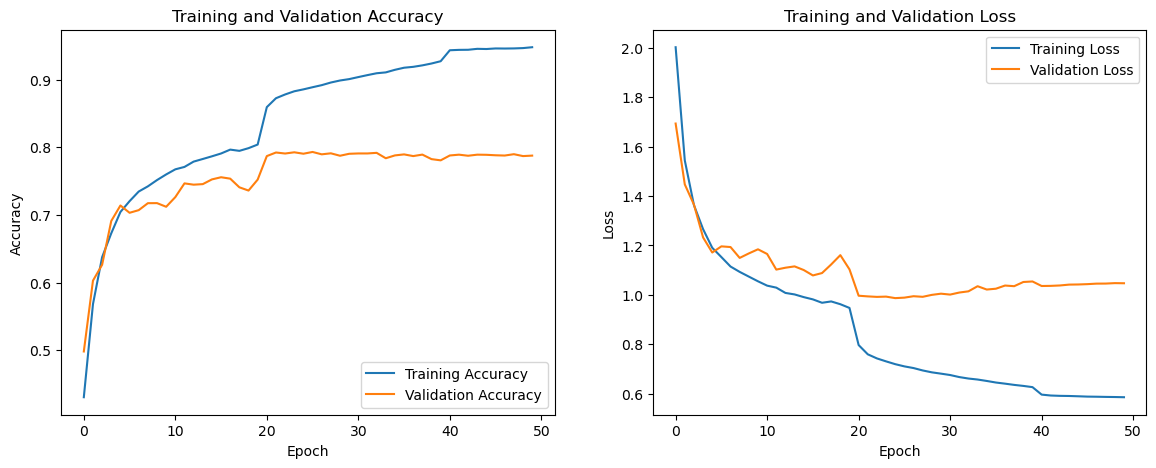

In [11]:
# Plot training and validation accuracy and loss side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Training and validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')
ax1.set_title('Training and Validation Accuracy')

# Training and validation loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.set_title('Training and Validation Loss')

plt.show()

## Model Performance Analysis

The graphs above show the training and validation accuracy (left) and loss (right) over 50 epochs.

### Training and Validation Accuracy
- **Training Accuracy** (blue line): The accuracy steadily increases, reaching above 0.9 by the 50th epoch. This indicates that the model is learning well from the training data.
- **Validation Accuracy** (orange line): The validation accuracy improves initially but plateaus around 0.8. This suggests that while the model is performing well on the training data, it might not generalize as well to unseen data, potentially indicating some overfitting.

### Training and Validation Loss
- **Training Loss** (blue line): The training loss decreases significantly, dropping below 0.5 by the 50th epoch. This indicates that the model is effectively minimizing the error on the training data.
- **Validation Loss** (orange line): The validation loss decreases initially but remains relatively stable after the initial epochs, hovering around 1.0. This further suggests that while the model is reducing error on the training set, it might be overfitting since the validation loss does not decrease as significantly.

### Summary
- The model shows strong performance on the training set, but the gap between training and validation accuracy, as well as the relatively stable validation loss, indicates potential overfitting.
- To improve generalization, techniques such as data augmentation, regularization, or early stopping might be applied.

# Evaluating Model Performance with a Confusion Matrix

In this section, we evaluate the model's performance on the test set using a confusion matrix. The confusion matrix provides insights into the number of correct and incorrect predictions for each class.

- **Predict the Labels**: Use the trained model to predict the labels for the test images.
- **Compute the Confusion Matrix**: Calculate the confusion matrix to compare the true labels with the predicted labels.
- **Plot the Confusion Matrix**: Visualize the confusion matrix using a heatmap for better understanding.

The following code performs these steps:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


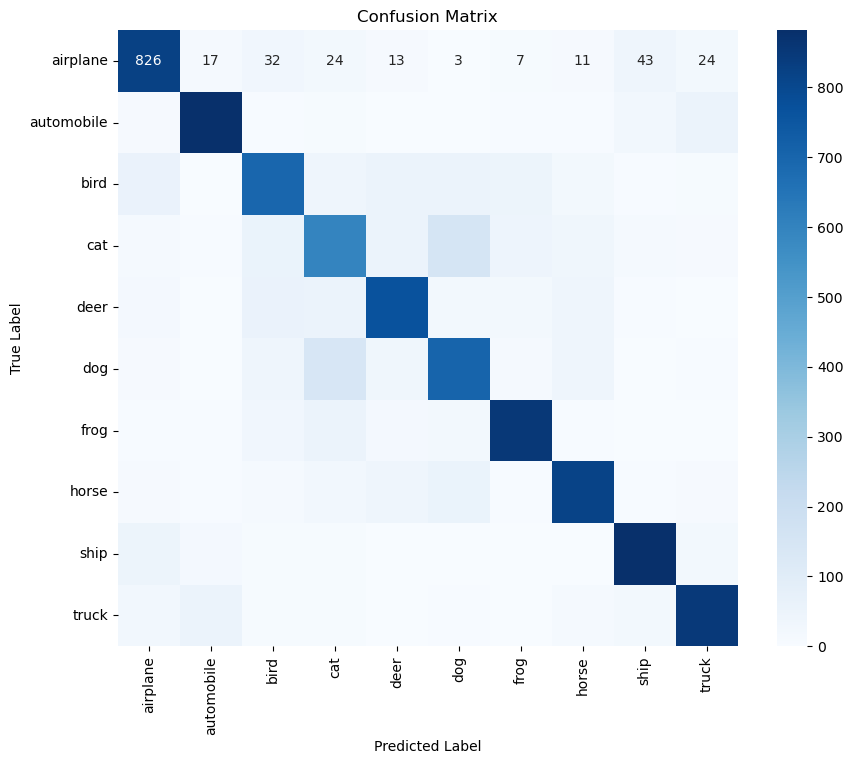

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = test_labels.flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generating a Classification Report

In this section, we generate a classification report to provide a detailed performance analysis of the model. The classification report includes metrics such as precision, recall, and F1-score for each class.

- **Classification Report**: Use the `classification_report` function from `sklearn.metrics` to generate the report based on the true labels and predicted labels.

The following code generates and prints the classification report:

In [13]:
from sklearn.metrics import classification_report

# Print the classification report
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    airplane       0.79      0.83      0.81      1000
  automobile       0.89      0.88      0.88      1000
        bird       0.73      0.70      0.72      1000
         cat       0.62      0.60      0.61      1000
        deer       0.77      0.77      0.77      1000
         dog       0.69      0.70      0.70      1000
        frog       0.84      0.85      0.85      1000
       horse       0.81      0.82      0.82      1000
        ship       0.87      0.88      0.88      1000
       truck       0.86      0.85      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



## Conclusion

In this notebook, we built and trained a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class.

### Key Steps and Findings:
1. **Data Loading and Preprocessing**: 
   - We successfully loaded and normalized the CIFAR-10 dataset. 
   - The labels were converted to categorical format for model training.

2. **Model Building**:
   - The CNN architecture included three convolutional layers with increasing filter sizes (32, 64, and 64), followed by max-pooling layers. 
   - A fully connected dense layer with 64 units and an output layer with 10 units (softmax activation) were used for classification.

3. **Model Training**:
   - The model was compiled with the Adam optimizer and categorical cross-entropy loss function.
   - It was trained over several epochs, showing steady improvement in accuracy on both training and validation datasets.

4. **Model Evaluation**:
   - The model achieved an accuracy of approximately 79% on the CIFAR-10 test set.
   - The classification report provided detailed metrics (precision, recall, F1-score) for each class, indicating that the model performed well across most categories but had room for improvement in others.

### Future Improvements:
To enhance the performance of our model, we could consider the following improvements:
- **Hyperparameter Tuning**: Experiment with different architectures, learning rates, and batch sizes to optimize model performance.
- **Data Augmentation**: Implement the setup `ImageDataGenerator` for real-time data augmentation during training, which can help improve model generalization.
- **Regularization Techniques**: Apply dropout, L2 regularization, or batch normalization to reduce overfitting.
- **Transfer Learning**: Utilize pre-trained models such as VGG16, ResNet, or Inception for transfer learning, which can leverage pre-learned features and improve accuracy.

Overall, the CNN model demonstrated solid performance on the CIFAR-10 dataset, with opportunities for further refinement and enhancement.